## Importing the requried libraries

In [ ]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

hdf5_file = r"C:\Users\vudut\OneDrive\Desktop\Python\MINI Project\Data Sets\jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5"  # Change to your actual file
output_dir = "higgs_images"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")
for path in [train_dir, val_dir]:
    os.makedirs(os.path.join(path, "signal"), exist_ok=True)
    os.makedirs(os.path.join(path, "background"), exist_ok=True)

with h5py.File(hdf5_file, "r") as f:
    print(list(f.keys()))  # Lists all available keys

with h5py.File(hdf5_file, "r") as f:
    features = np.array(f["image"])  # Corrected key
    labels = np.array(f["signal"])  # Corrected key

# Ensure image dimensions are valid
num_samples, img_height, img_width = features.shape
assert img_height == img_width, "Images must be square"


# Save images
train_split = int(0.8 * num_samples)
for i in tqdm(range(num_samples), desc="Saving images"):
    img = features[i]
    label = "signal" if labels[i] == 1 else "background"
    
    folder = train_dir if i < train_split else val_dir
    filename = os.path.join(folder, label, f"{i}.png")
    
    plt.imsave(filename, img, cmap="gray")  # Save as grayscale image

print("✅ Conversion complete! Images saved in:", output_dir)


import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Define paths
train_signal_dir = "higgs_images/train/signal"
train_background_dir = "higgs_images/train/background"

# Select random images from each category
signal_images = random.sample(os.listdir(train_signal_dir), 5)
background_images = random.sample(os.listdir(train_background_dir), 5)

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, img_name in enumerate(signal_images):
    img_path = os.path.join(train_signal_dir, img_name)
    img = Image.open(img_path)
    axes[0, i].imshow(img, cmap="gray")
    axes[0, i].set_title("Signal")
    axes[0, i].axis("off")

for i, img_name in enumerate(background_images):
    img_path = os.path.join(train_background_dir, img_name)
    img = Image.open(img_path)
    axes[1, i].imshow(img, cmap="gray")
    axes[1, i].set_title("Background")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()


import tensorflow as tf

# Dataset Paths
train_dir = "higgs_images/train"
val_dir = "higgs_images/val"
batch_size = 4  # Reduce batch size to prevent kernel crashes
img_size = (32, 32)  # Match generated image size

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",  # Binary classification (signal vs background)
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

print("✅ Dataset loaded successfully!")



import tensorflow as tf
from tensorflow.keras import layers, models
import wandb
# ✅ Initialize Weights & Biases (W&B)
wandb.init(project="higgs_boson_cnn", name="project_cnn1")

# ✅ Define CNN Architecture
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")  # Binary classification
    ])
    return model

# ✅ Create and Compile Model
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ✅ Train Model
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10
    )

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(f"\n🎯 Final Test Accuracy: {test_acc:.4f}")




['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']


KeyboardInterrupt: 

In [2]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

## Setting up the image directories

In [8]:
hdf5_file = r"C:\Users\vudut\OneDrive\Desktop\Python\MINI Project\Data Sets\jet-images_Mass60-100_pT250-300_R1.25_Pix25.hdf5"  # Change to your actual file
output_dir = "higgs_images"
train_dir = os.path.join(output_dir, "train")
val_dir = os.path.join(output_dir, "val")

In [17]:
for path in [train_dir, val_dir]:
    os.makedirs(os.path.join(path, "signal"), exist_ok=True)
    os.makedirs(os.path.join(path, "background"), exist_ok=True)


## Loading the dataset

In [18]:
with h5py.File(hdf5_file, "r") as f:
    print(list(f.keys()))  # Lists all available keys

['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']


In [19]:
with h5py.File(hdf5_file, "r") as f:
    features = np.array(f["image"])  # Corrected key
    labels = np.array(f["signal"])  # Corrected key

In [20]:
# Ensure image dimensions are valid
num_samples, img_height, img_width = features.shape
assert img_height == img_width, "Images must be square"


## Saving the images

In [21]:
# Save images
train_split = int(0.8 * num_samples)
for i in tqdm(range(num_samples), desc="Saving images"):
    img = features[i]
    label = "signal" if labels[i] == 1 else "background"
    
    folder = train_dir if i < train_split else val_dir
    filename = os.path.join(folder, label, f"{i}.png")
    
    plt.imsave(filename, img, cmap="gray")  # Save as grayscale image

print("✅ Conversion complete! Images saved in:", output_dir)

Saving images: 100%|██████████| 872666/872666 [35:41<00:00, 407.48it/s]   


✅ Conversion complete! Images saved in: higgs_images


## Visualing the images

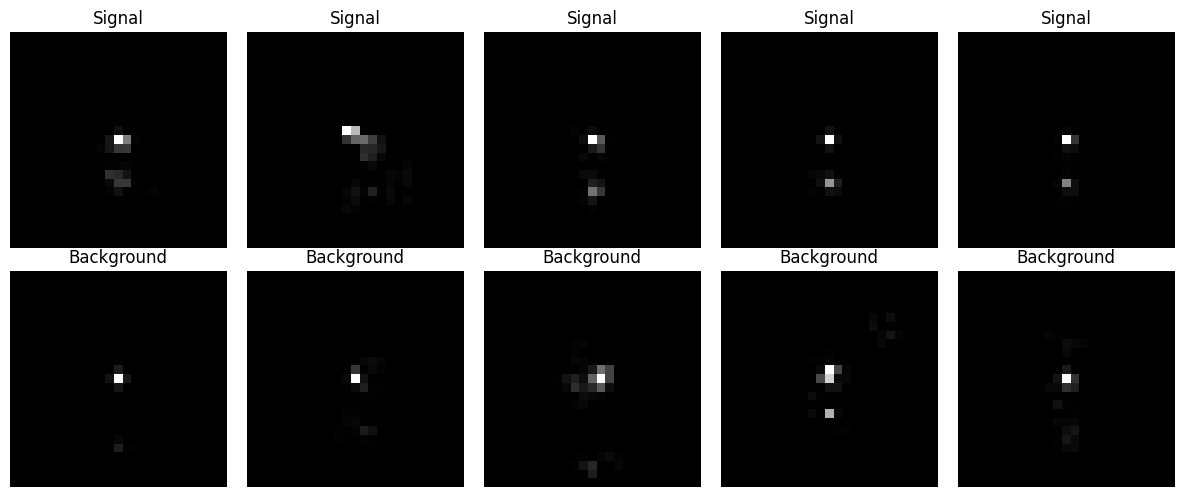

In [4]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image

# Define paths
train_signal_dir = "higgs_images/train/signal"
train_background_dir = "higgs_images/train/background"

# Select random images from each category
signal_images = random.sample(os.listdir(train_signal_dir), 5)
background_images = random.sample(os.listdir(train_background_dir), 5)

# Plot images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, img_name in enumerate(signal_images):
    img_path = os.path.join(train_signal_dir, img_name)
    img = Image.open(img_path)
    axes[0, i].imshow(img, cmap="gray")
    axes[0, i].set_title("Signal")
    axes[0, i].axis("off")

for i, img_name in enumerate(background_images):
    img_path = os.path.join(train_background_dir, img_name)
    img = Image.open(img_path)
    axes[1, i].imshow(img, cmap="gray")
    axes[1, i].set_title("Background")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

## Loading the dataset

In [ ]:
import tensorflow as tf

# Dataset Paths
train_dir = "higgs_images/train"
val_dir = "higgs_images/val"
batch_size = 4  # Reduce batch size to prevent kernel crashes
img_size = (32, 32)  # Match generated image size

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",  # Binary classification (signal vs background)
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

print("✅ Dataset loaded successfully!")


Found 698132 files belonging to 2 classes.
Found 174534 files belonging to 2 classes.
✅ Dataset loaded successfully!


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import wandb

In [15]:
# ✅ Initialize Weights & Biases (W&B)
wandb.init(project="higgs_boson_cnn", name="project_cnn1")

# ✅ Define CNN Architecture
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")  # Binary classification
    ])
    return model

# ✅ Create and Compile Model
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [17]:
# ✅ Train Model
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=10
    )

# ✅ Evaluate Model
test_loss, test_acc = model.evaluate(val_ds, verbose=2)
print(f"\n🎯 Final Test Accuracy: {test_acc:.4f}")


Epoch 1/10
174533/174533 [==============================] - 1058s 6ms/step - loss: 0.4495 - accuracy: 0.7972 - val_loss: 0.4269 - val_accuracy: 0.8135
Epoch 2/10
174533/174533 [==============================] - 1009s 6ms/step - loss: 0.4267 - accuracy: 0.8103 - val_loss: 0.4167 - val_accuracy: 0.8162
Epoch 3/10
174533/174533 [==============================] - 1018s 6ms/step - loss: 0.4221 - accuracy: 0.8131 - val_loss: 0.4127 - val_accuracy: 0.8177
Epoch 4/10
174533/174533 [==============================] - 1117s 6ms/step - loss: 0.4204 - accuracy: 0.8137 - val_loss: 0.4130 - val_accuracy: 0.8175
Epoch 5/10
174533/174533 [==============================] - 1036s 6ms/step - loss: 0.4199 - accuracy: 0.8140 - val_loss: 0.4152 - val_accuracy: 0.8179
Epoch 6/10
174533/174533 [==============================] - 1390s 8ms/step - loss: 0.4191 - accuracy: 0.8148 - val_loss: 0.4138 - val_accuracy: 0.8175
Epoch 7/10
174533/174533 [==============================] - 1424s 8ms/step - loss: 0.4191 - ac

In [18]:
model.save("particle_cnn_model.h5")

In [19]:
new_model = tf.keras.models.load_model("particle_cnn_model.h5")
print("✅ Model loaded successfully!")

✅ Model loaded successfully!


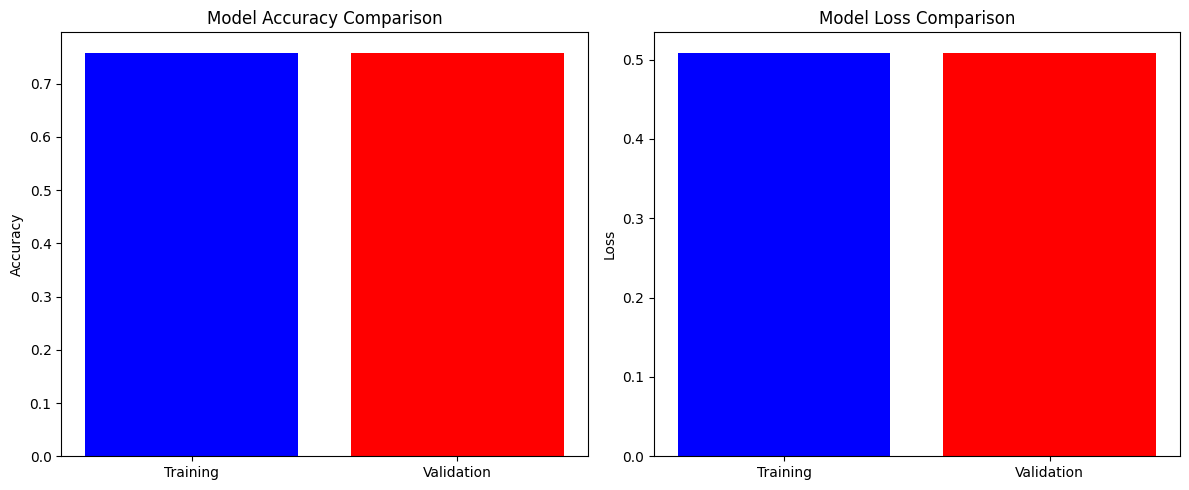


Model Evaluation Metrics:
Training Accuracy: 0.7574
Validation Accuracy: 0.7584
Training Loss: 0.5084
Validation Loss: 0.5089


In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

def extract_metrics_from_model(model, train_ds, val_ds):
    """
    Extract training and validation metrics from an already trained model.
    
    Parameters:
    model: Trained Keras model
    train_ds: Training dataset
    val_ds: Validation dataset
    
    Returns:
    Dictionary of metrics
    """
    # Evaluate on training and validation datasets
    train_metrics = model.evaluate(train_ds, verbose=0)
    val_metrics = model.evaluate(val_ds, verbose=0)
    
    # Create a dictionary to store metrics
    metrics = {
        'train_loss': train_metrics[0],
        'train_accuracy': train_metrics[1],
        'val_loss': val_metrics[0],
        'val_accuracy': val_metrics[1]
    }
    
    return metrics

# Extract metrics
metrics = extract_metrics_from_model(model, train_ds, val_ds)

def plot_metrics_comparison(metrics):
    """
    Create a visualization comparing training and validation metrics.
    
    Parameters:
    metrics: Dictionary of metrics
    """
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Accuracy Bar Plot
    ax1.bar(['Training', 'Validation'], 
            [metrics['train_accuracy'], metrics['val_accuracy']], 
            color=['blue', 'red'])
    ax1.set_title('Model Accuracy Comparison')
    ax1.set_ylabel('Accuracy')
    
    # Loss Bar Plot
    ax2.bar(['Training', 'Validation'], 
            [metrics['train_loss'], metrics['val_loss']], 
            color=['blue', 'red'])
    ax2.set_title('Model Loss Comparison')
    ax2.set_ylabel('Loss')
    
    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics_comparison(metrics)

# Print out the metrics
print("\nModel Evaluation Metrics:")
print(f"Training Accuracy: {metrics['train_accuracy']:.4f}")
print(f"Validation Accuracy: {metrics['val_accuracy']:.4f}")
print(f"Training Loss: {metrics['train_loss']:.4f}")
print(f"Validation Loss: {metrics['val_loss']:.4f}")

## Optimized code with W&B Logging

In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.metrics import Precision, Recall
import wandb

# Initialize Weights & Biases with more detailed configuration
wandb.init(
    project="higgs_boson_cnn", 
    name="higgs_cnn_full_logging",
    config={
        "learning_rate": 1e-4,
        "batch_size": 4,
        "epochs": 10,
        "image_size": (32, 32),
        "architecture": "3-layer CNN"
    }
)

# Dataset Paths
train_dir = "higgs_images/train"
val_dir = "higgs_images/val"
batch_size = wandb.config.batch_size
img_size = wandb.config.image_size

# Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="binary"
)

# Optimize dataset performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Define CNN Architecture
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")  # Binary classification
    ])
    return model

# Create and Compile Model
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=wandb.config.learning_rate),
    loss="binary_crossentropy",
    metrics=["accuracy", Precision(), Recall()]
)

# Checkpoint Callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

# WandB Metrics Logger (replacing deprecated WandbCallback)
wandb_metrics_logger = wandb.keras.WandbMetricsLogger()

# Train Model with Comprehensive Logging
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=wandb.config.epochs,
    callbacks=[
        wandb_metrics_logger,
        checkpoint_callback,
        early_stopping
    ]
)

# Final Model Evaluation
test_loss, test_acc, test_precision, test_recall = model.evaluate(val_ds, verbose=2)
print(f"\n🎯 Final Test Metrics:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")

# Log final test metrics
wandb.summary["test_accuracy"] = test_acc
wandb.summary["test_precision"] = test_precision
wandb.summary["test_recall"] = test_recall

# Close W&B run
wandb.finish()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: vuduthasaipraneetham (praneetham) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Found 698132 files belonging to 2 classes.
Found 174534 files belonging to 2 classes.
Epoch 1/10
174533/174533 [==============================] - 1729s 10ms/step - loss: 0.4462 - accuracy: 0.7986 - precision: 0.8052 - recall: 0.7891 - val_loss: 0.4144 - val_accuracy: 0.8144 - val_precision: 0.8211 - val_recall: 0.7992
Epoch 2/10
174533/174533 [==============================] - 1695s 10ms/step - loss: 0.4237 - accuracy: 0.8118 - precision: 0.8184 - recall: 0.8027 - val_loss: 0.4121 - val_accuracy: 0.8159 - val_precision: 0.8190 - val_recall: 0.8063
Epoch 3/10
174533/174533 [==============================] - 1792s 10ms/step - loss: 0.4203 - accuracy: 0.8136 - precision: 0.8194 - recall: 0.8059 - val_loss: 0.4105 - val_accuracy: 0.8164 - val_precision: 0.8205 - val_recall: 0.8052
Epoch 4/10
174533/174533 [==============================] - 1523s 9ms/step - loss: 0.4190 - accuracy: 0.8145 - precision: 0.8201 - recall: 0.8071 - val_loss: 0.4112 - val_accuracy: 0.8173 - val_precision: 0.8121 

epoch/accuracy,▁▇████
epoch/epoch,▁▂▄▅▇█
epoch/learning_rate,▁▁▁▁▁▁
epoch/loss,█▂▁▁▁▁
epoch/precision,▁▇████
epoch/recall,▁▆▇███
epoch/val_accuracy,▁▄▅▇█▆
epoch/val_loss,█▄▁▂▁▁
epoch/val_precision,█▆█▁▅▂
epoch/val_recall,▁▃▃█▅▇
epoch/accuracy,0.81477


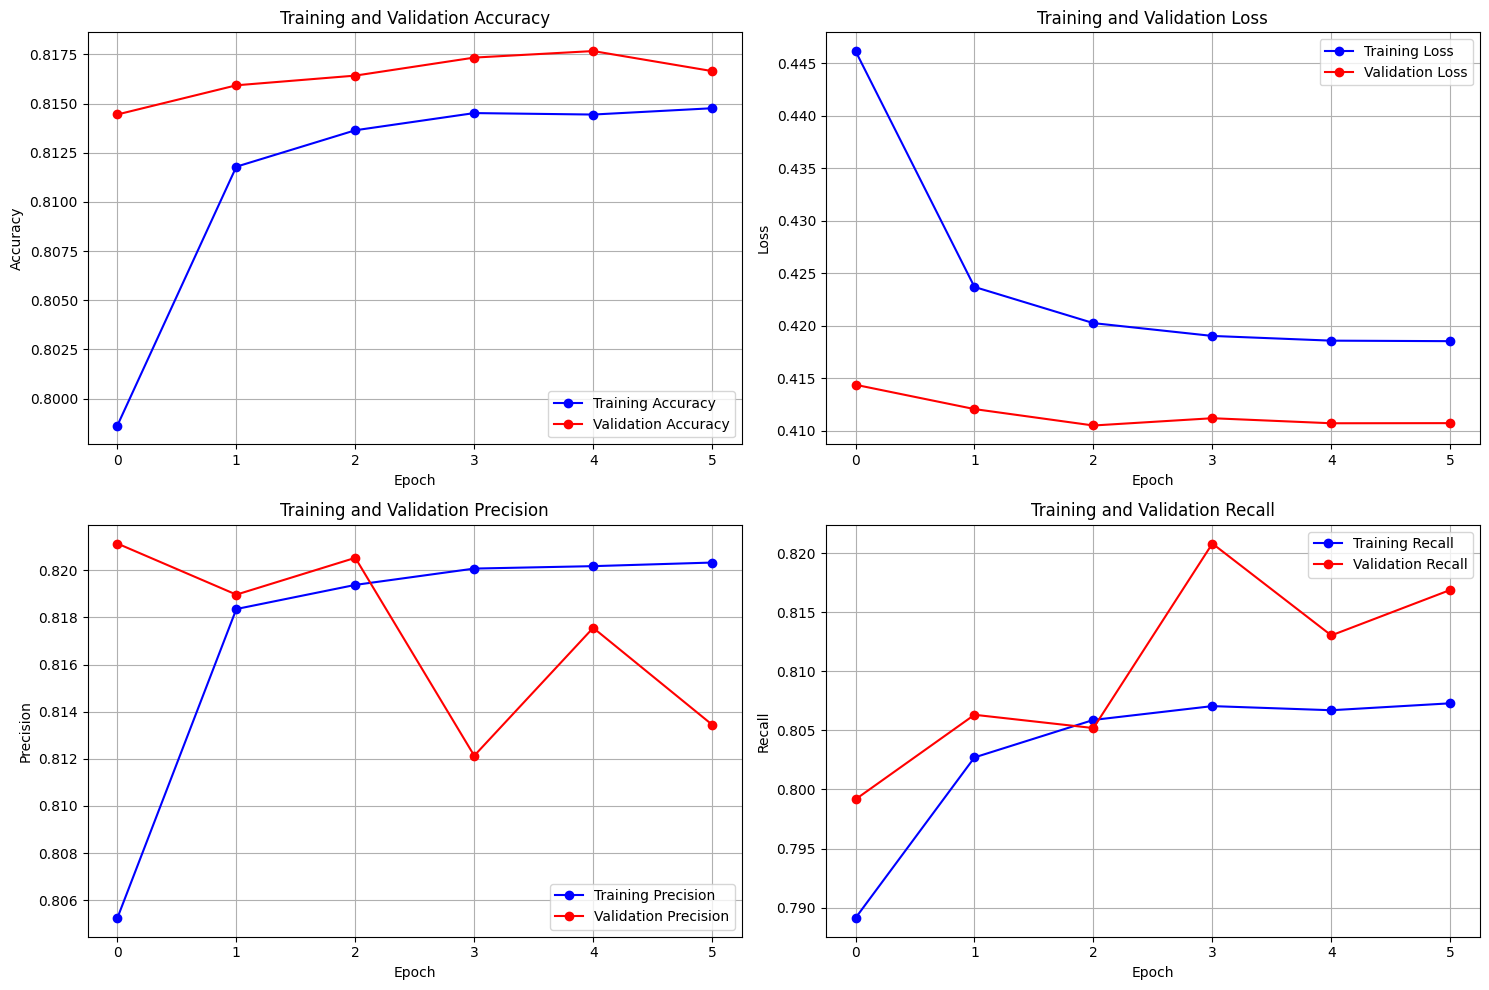

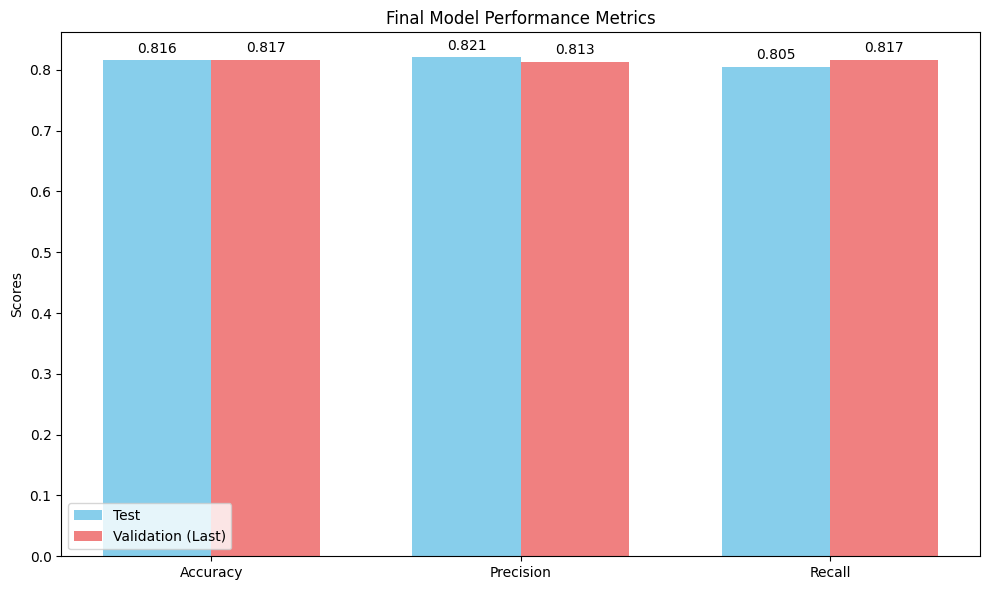

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Add this after your existing code (assuming history, test_acc, etc., are defined)

# Extract metrics from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_precision = history.history['precision']  # Adjust if name is different (e.g., 'precision_1')
val_precision = history.history['val_precision']
train_recall = history.history['recall']
val_recall = history.history['val_recall']
epochs_range = range(len(train_acc))

# Create directory for saving plots if it doesn't exist
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))

# 1. Accuracy Plot
plt.subplot(2, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='red', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 2. Loss Plot
plt.subplot(2, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss', color='blue', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 3. Precision Plot
plt.subplot(2, 2, 3)
plt.plot(epochs_range, train_precision, label='Training Precision', color='blue', marker='o')
plt.plot(epochs_range, val_precision, label='Validation Precision', color='red', marker='o')
plt.title('Training and Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

# 4. Recall Plot
plt.subplot(2, 2, 4)
plt.plot(epochs_range, train_recall, label='Training Recall', color='blue', marker='o')
plt.plot(epochs_range, val_recall, label='Validation Recall', color='red', marker='o')
plt.title('Training and Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

# Adjust layout and save
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'training_metrics.png'))
plt.show()
plt.close()  # Close the figure to free memory

# Additional Visualization: Bar plot of final metrics
final_metrics = {
    'Accuracy': [test_acc, val_acc[-1]],
    'Precision': [test_precision, val_precision[-1]],
    'Recall': [test_recall, val_recall[-1]]
}

x = np.arange(len(final_metrics))  # label locations
width = 0.35  # width of bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [m[0] for m in final_metrics.values()], width, label='Test', color='skyblue')
rects2 = ax.bar(x + width/2, [m[1] for m in final_metrics.values()], width, label='Validation (Last)', color='lightcoral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Final Model Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(final_metrics.keys())
ax.legend()

# Add value labels on top of bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'final_metrics.png'))
plt.show()
plt.close()  # Close the figure to free memory

# Note: Removed wandb.log and wandb.finish() since we're not logging to W&B